# Fast Track Deploy Complete Demo

## Deploy Databases
### Deploy MariaDB

Click on "Import Framework" on the top right, give it a name, description, select Data Engineering and upload a picture, eg the logo which you can find in this git project under end2end/infrastructure/import_application/mariadb

On the next screen upload a new helm chart, the .tgz file which you can find in this project under end2end/infrastructure/import_application/mariadb. In the next screen you can customize the values, like for example the endpoint of the virtualednpoint if you don't like mariadb-discover as prefix.

After successful deployment of the Database we need to add a NodePort service so the database is accessible.

### Deploy two mysql DBs

### Add as Datasources in EZUA

## Import Data in the Databases

## Configure Airflow

The Airflow DAGs need to be adapted to work with your environment, everything in op_kwargs might need adaption. After making the adaptions you need to configure the Airflow to point to the git with your DAGs, do so by clicking on the three dots of the appliaction tile and enter the Git Repository as well as branch and user and password to your DAGs. 
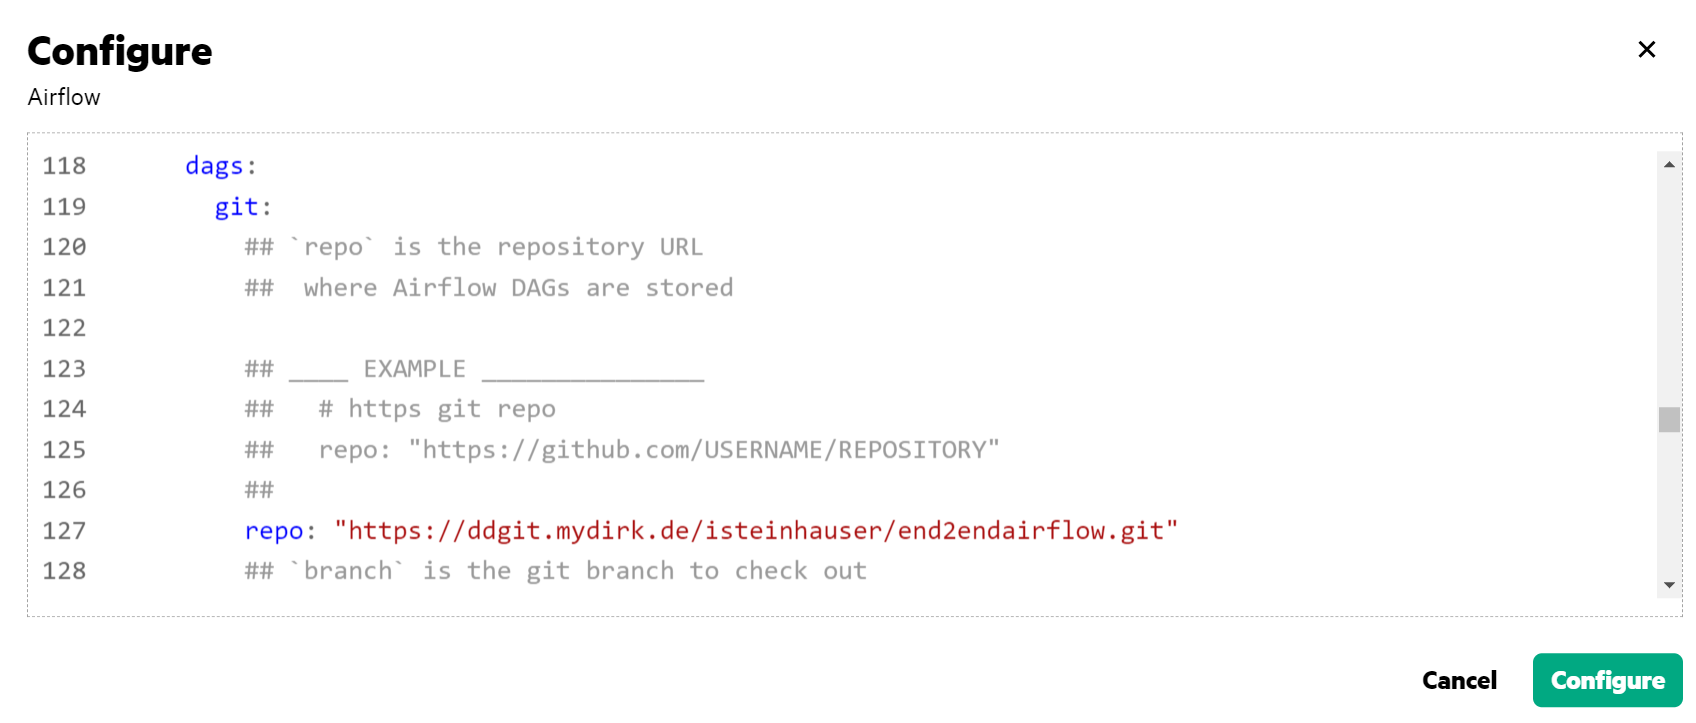
Caution: the user you provide must have the role of a maintainer in order for the DAGs to appear. Check if this is the case by opening Airflow after Airflow is shown as running again, you should see 3 DAGs:
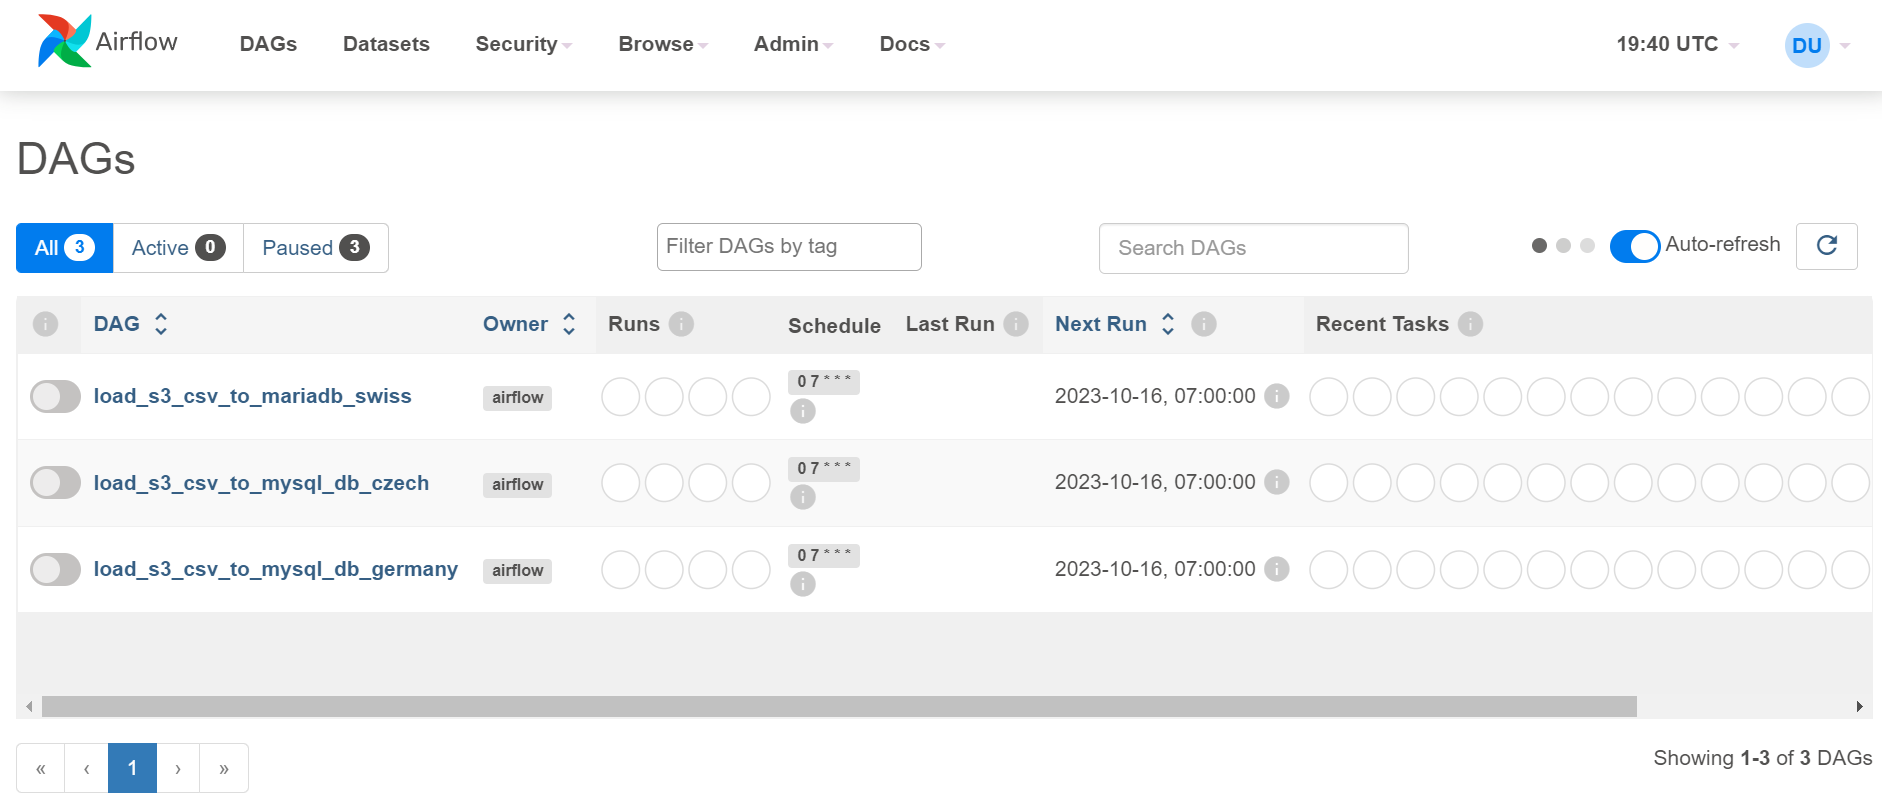

## Configure Presto and Superset

### Add Presto Query
The query which you need to add in Presto and save as cached asset is the following. Adapt according to the datasources you have added in your environment:
```sql
SELECT * FROM czech_mysql_store1.discover.czech UNION ALL SELECT * FROM german_mysql_store1.discover.germany UNION ALL ( SELECT PRODUCTID , PRODUCT , TYPE , UNITPRICE , UNIT , QTY , TOTALSALES , CURRENCY , STORE , (CASE WHEN (country = 'Swiss') THEN 'Switzerland' ELSE country END) COUNTRY , YEAR FROM swiss_mariadb_store1.discover.swiss )
```

### Add Superset
Open Superset and head to the Dashboards page. On the top right, you can Import Dashboards. 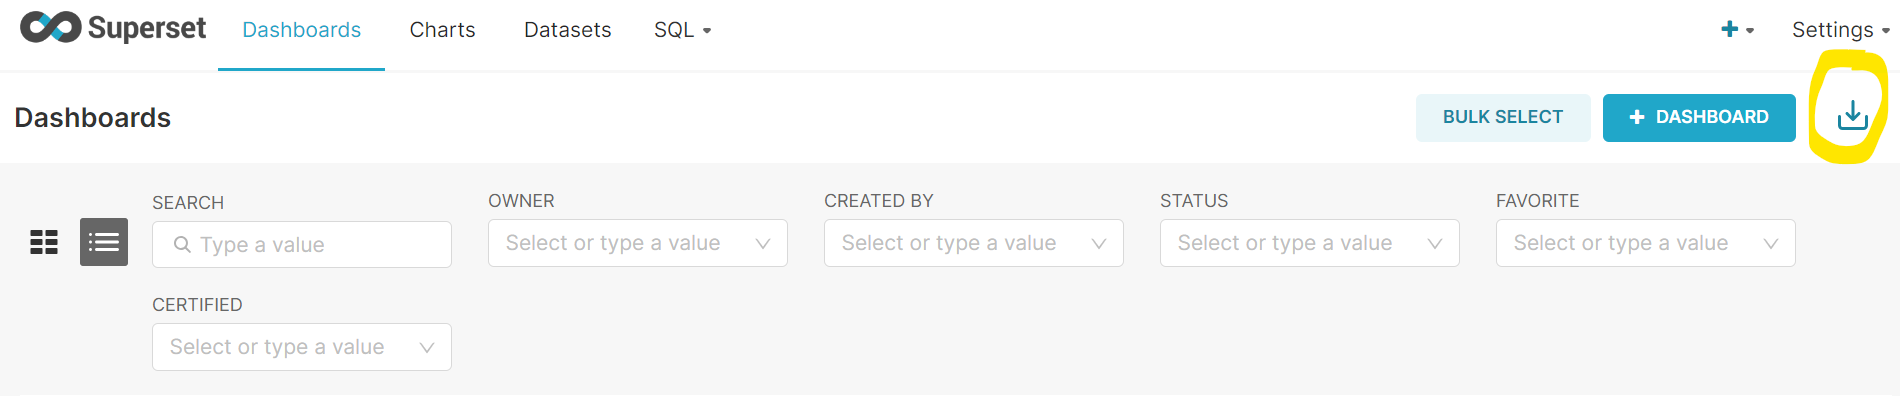 Upload the Superset_retaildashboard.zip file in Superset. Everything, including Databases, Datasets and charts will be added. In order to make it work in your environment you need to adapt it, eg in Settings/Database Connections adapt the SQL Alchemy URI of the Presto Database: presto://ezpresto.YOUR_DOMAIN:443/cache 